### Importação dos dados



In [2]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [3]:
total_loja = loja['Preço'].sum()
total_loja2 = loja2['Preço'].sum()
total_loja3 = loja3['Preço'].sum()
total_loja4 = loja4['Preço'].sum()

print(f"Total Loja 1: {total_loja}")
print(f"Total Loja 2: {total_loja2}")
print(f"Total Loja 3: {total_loja3}")
print(f"Total Loja 4: {total_loja4}")

Total Loja 1: 1534509.12
Total Loja 2: 1488459.06
Total Loja 3: 1464025.03
Total Loja 4: 1384497.58


In [4]:
import matplotlib.pyplot as plt

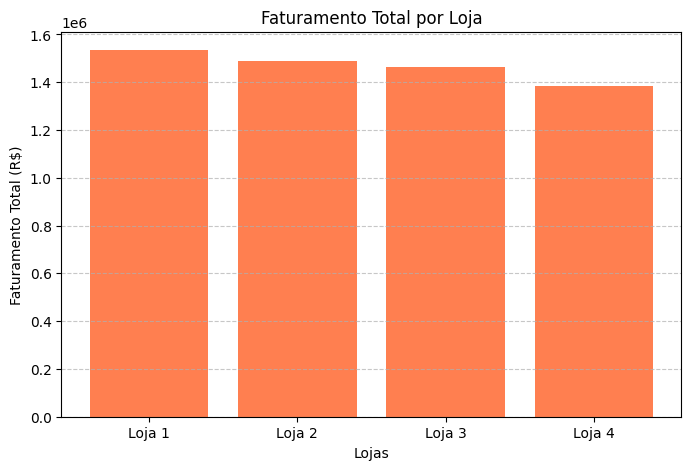

In [5]:
faturamento_loja1 = loja['Preço'].sum()
faturamento_loja2 = loja2['Preço'].sum()
faturamento_loja3 = loja3['Preço'].sum()
faturamento_loja4 = loja4['Preço'].sum()

lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']

faturamentos = [faturamento_loja1, faturamento_loja2, faturamento_loja3, faturamento_loja4]

plt.figure(figsize=(8, 5))
plt.bar(lojas, faturamentos, color='coral')

plt.xlabel('Lojas')
plt.ylabel('Faturamento Total (R$)')
plt.title('Faturamento Total por Loja')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

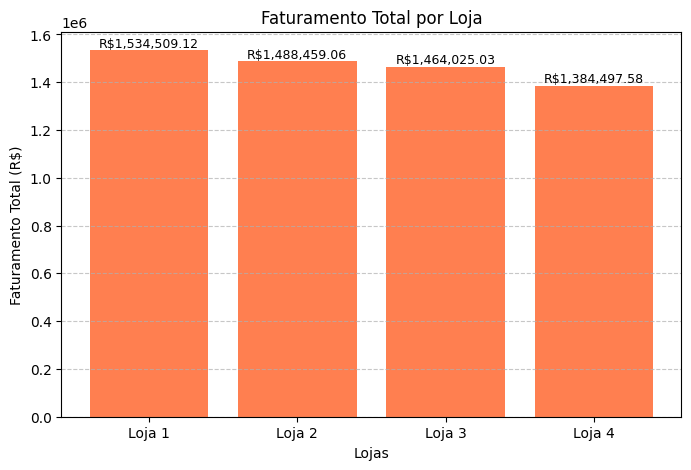

In [6]:
#Opção do gráfico com valores:
faturamento_loja1 = loja['Preço'].sum()
faturamento_loja2 = loja2['Preço'].sum()
faturamento_loja3 = loja3['Preço'].sum()
faturamento_loja4 = loja4['Preço'].sum()

lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']

faturamentos = [faturamento_loja1, faturamento_loja2, faturamento_loja3, faturamento_loja4]

plt.figure(figsize=(8, 5))
barras = plt.bar(lojas, faturamentos, color='coral')

plt.xlabel('Lojas')
plt.ylabel('Faturamento Total (R$)')
plt.title('Faturamento Total por Loja')
plt.grid(axis='y', linestyle='--', alpha=0.7)

for barra in barras:
    altura = barra.get_height()
    plt.text(barra.get_x() + barra.get_width()/2, altura + 100, f'R${altura:,.2f}',
             ha='center', va='bottom', fontsize=9)

plt.show()

# 2. Vendas por Categoria


In [7]:
for i, l in enumerate([loja, loja2, loja3, loja4], start=1):
    print(f"==== Loja {i} ====")


    categoria_contagem = l['Categoria do Produto'].value_counts()

    categoria_mais_vendida = categoria_contagem.idxmax()
    vendas_mais_vendida = categoria_contagem.max()

    categoria_menos_vendida = categoria_contagem.idxmin()
    vendas_menos_vendida = categoria_contagem.min()

    print("Mais vendida:", categoria_mais_vendida, "-", vendas_mais_vendida, "vendas")
    print("Menos vendida:", categoria_menos_vendida, "-", vendas_menos_vendida, "vendas")

    faturamento_categoria = l.groupby('Categoria do Produto')['Preço'].sum().sort_values(ascending=False)

    print("Faturamento por categoria:")
    print(faturamento_categoria)
    print("\n" + "="*30 + "\n")

==== Loja 1 ====
Mais vendida: moveis - 465 vendas
Menos vendida: utilidades domesticas - 171 vendas
Faturamento por categoria:
Categoria do Produto
eletronicos              572659.23
eletrodomesticos         484913.36
moveis                   250178.11
instrumentos musicais    121731.69
esporte e lazer           52387.55
brinquedos                23993.78
utilidades domesticas     16931.48
livros                    11713.92
Name: Preço, dtype: float64


==== Loja 2 ====
Mais vendida: moveis - 442 vendas
Menos vendida: utilidades domesticas - 181 vendas
Faturamento por categoria:
Categoria do Produto
eletronicos              547773.71
eletrodomesticos         464758.13
moveis                   235234.68
instrumentos musicais    139987.03
esporte e lazer           46326.09
brinquedos                21262.21
utilidades domesticas     19662.86
livros                    13454.35
Name: Preço, dtype: float64


==== Loja 3 ====
Mais vendida: moveis - 499 vendas
Menos vendida: instrumentos mus

==== Loja 1 ====
Mais vendida: moveis - 465 vendas
Menos vendida: utilidades domesticas - 171 vendas
Faturamento por categoria:
Categoria do Produto
eletronicos              572659.23
eletrodomesticos         484913.36
moveis                   250178.11
instrumentos musicais    121731.69
esporte e lazer           52387.55
brinquedos                23993.78
utilidades domesticas     16931.48
livros                    11713.92
Name: Preço, dtype: float64


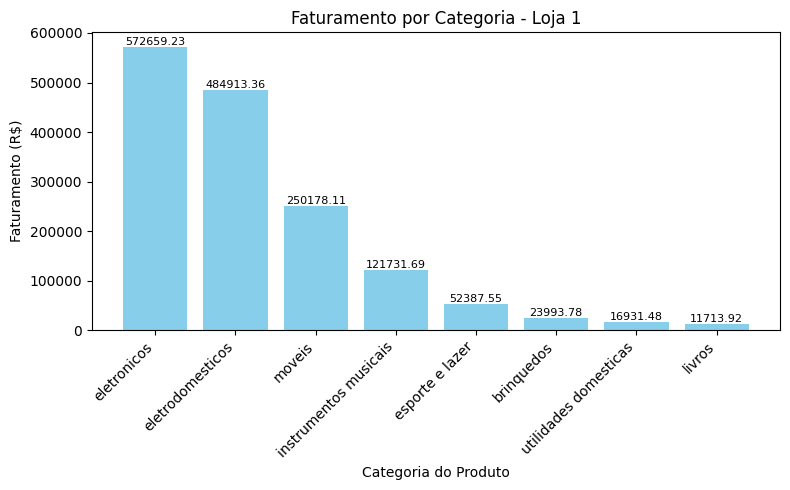



==== Loja 2 ====
Mais vendida: moveis - 442 vendas
Menos vendida: utilidades domesticas - 181 vendas
Faturamento por categoria:
Categoria do Produto
eletronicos              547773.71
eletrodomesticos         464758.13
moveis                   235234.68
instrumentos musicais    139987.03
esporte e lazer           46326.09
brinquedos                21262.21
utilidades domesticas     19662.86
livros                    13454.35
Name: Preço, dtype: float64


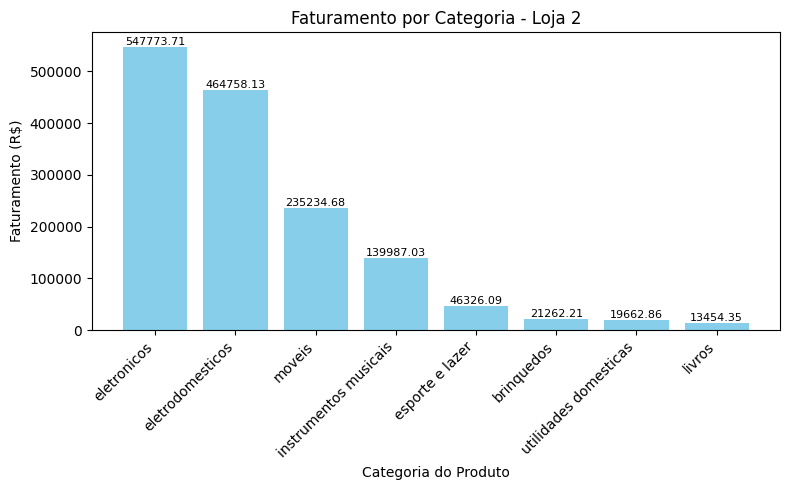



==== Loja 3 ====
Mais vendida: moveis - 499 vendas
Menos vendida: instrumentos musicais - 177 vendas
Faturamento por categoria:
Categoria do Produto
eletronicos              547699.92
eletrodomesticos         438984.89
moveis                   268095.56
instrumentos musicais    103174.45
esporte e lazer           47456.10
brinquedos                25869.20
utilidades domesticas     20080.21
livros                    12664.70
Name: Preço, dtype: float64


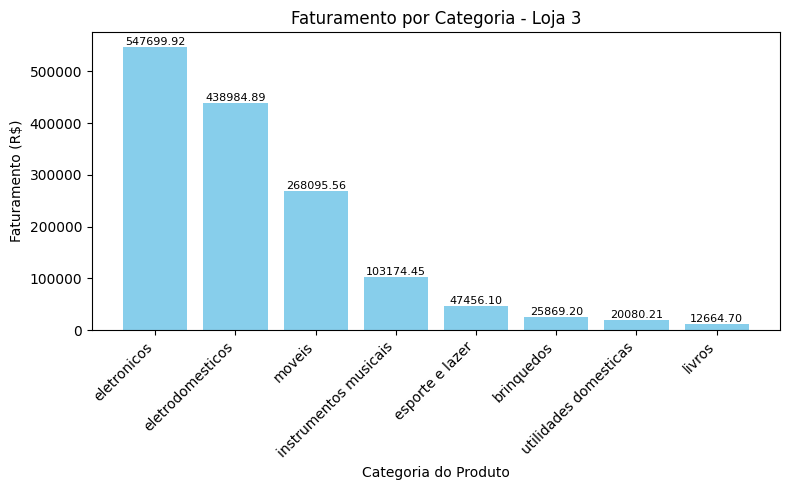



==== Loja 4 ====
Mais vendida: moveis - 480 vendas
Menos vendida: instrumentos musicais - 170 vendas
Faturamento por categoria:
Categoria do Produto
eletronicos              545966.86
eletrodomesticos         377680.65
moveis                   256705.65
instrumentos musicais    100136.50
esporte e lazer           44465.65
brinquedos                27015.67
utilidades domesticas     20098.83
livros                    12427.77
Name: Preço, dtype: float64


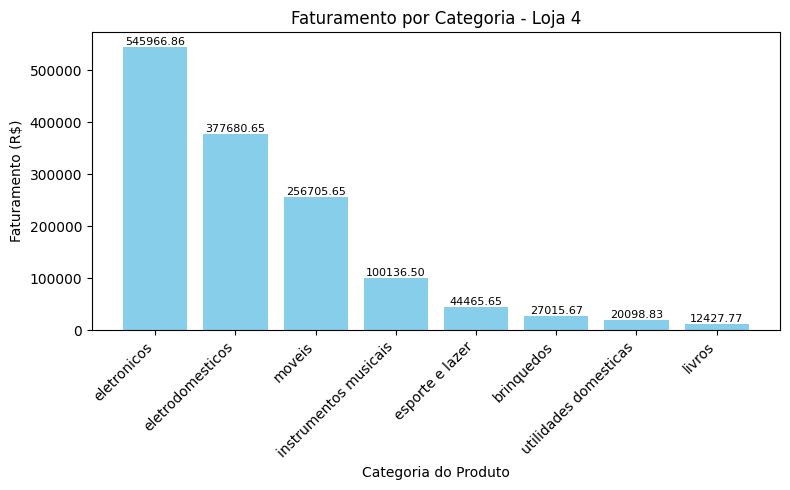

In [8]:
#opção com comparativo com grafico mais completa p minha melhor análise
for i, l in enumerate([loja, loja2, loja3, loja4], start=1):
    print(f"==== Loja {i} ====")

    categoria_contagem = l['Categoria do Produto'].value_counts()

    categoria_mais_vendida = categoria_contagem.idxmax()
    vendas_mais_vendida = categoria_contagem.max()

    categoria_menos_vendida = categoria_contagem.idxmin()
    vendas_menos_vendida = categoria_contagem.min()

    print("Mais vendida:", categoria_mais_vendida, "-", vendas_mais_vendida, "vendas")
    print("Menos vendida:", categoria_menos_vendida, "-", vendas_menos_vendida, "vendas")

    faturamento_categoria = l.groupby('Categoria do Produto')['Preço'].sum().sort_values(ascending=False)

    print("Faturamento por categoria:")
    print(faturamento_categoria)

    plt.figure(figsize=(8,5))
    bars = plt.bar(faturamento_categoria.index, faturamento_categoria.values, color='skyblue')

    plt.title(f'Faturamento por Categoria - Loja {i}')
    plt.xlabel('Categoria do Produto')
    plt.ylabel('Faturamento (R$)')
    plt.xticks(rotation=45, ha='right')


    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f'{yval:.2f}', ha='center', va='bottom', fontsize=8)

    plt.tight_layout()
    plt.show()

    print("\n" + "="*50 + "\n")


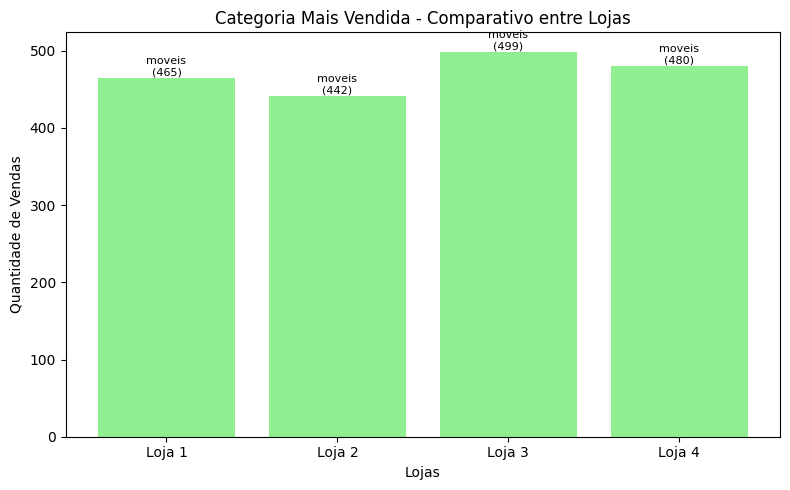

In [9]:
#opção mais vendidos:
lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
categorias_mais_vendidas = []
vendas_mais_vendidas = []

for l in [loja, loja2, loja3, loja4]:

    categoria_contagem = l['Categoria do Produto'].value_counts()

    categoria_mais_vendida = categoria_contagem.idxmax()
    vendas_mais_vendida = categoria_contagem.max()

    categorias_mais_vendidas.append(categoria_mais_vendida)
    vendas_mais_vendidas.append(vendas_mais_vendida)

plt.figure(figsize=(8,5))
bars = plt.bar(lojas, vendas_mais_vendidas, color='lightgreen')

plt.title('Categoria Mais Vendida - Comparativo entre Lojas')
plt.xlabel('Lojas')
plt.ylabel('Quantidade de Vendas')

for bar, categoria, vendas in zip(bars, categorias_mais_vendidas, vendas_mais_vendidas):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f'{categoria}\n({vendas})', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

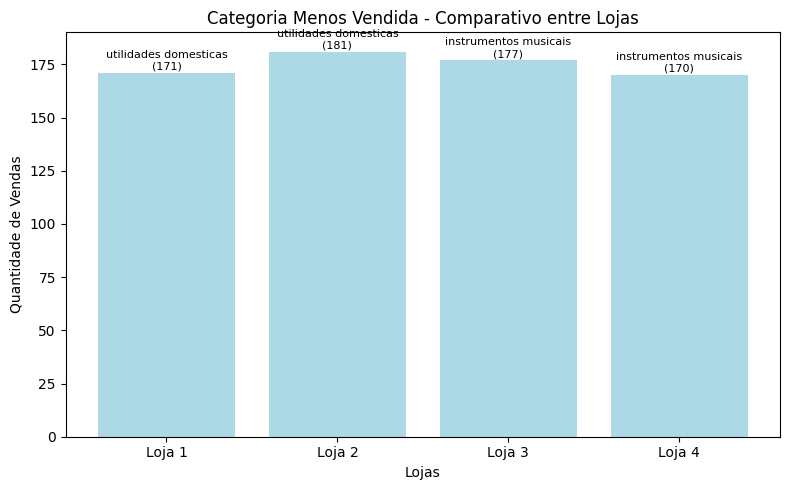

In [10]:
#opção para categoria menos vendida:
lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
categorias_menos_vendidas = []
vendas_menos_vendidas = []

for l in [loja, loja2, loja3, loja4]:
    categoria_contagem = l['Categoria do Produto'].value_counts()

    categoria_menos_vendida = categoria_contagem.idxmin()
    vendas_menos_vendida = categoria_contagem.min()

    categorias_menos_vendidas.append(categoria_menos_vendida)
    vendas_menos_vendidas.append(vendas_menos_vendida)

plt.figure(figsize=(8,5))
bars = plt.bar(lojas, vendas_menos_vendidas, color='lightblue')

plt.title('Categoria Menos Vendida - Comparativo entre Lojas')
plt.xlabel('Lojas')
plt.ylabel('Quantidade de Vendas')

for bar, categoria, vendas in zip(bars, categorias_menos_vendidas, vendas_menos_vendidas):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f'{categoria}\n({vendas})', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

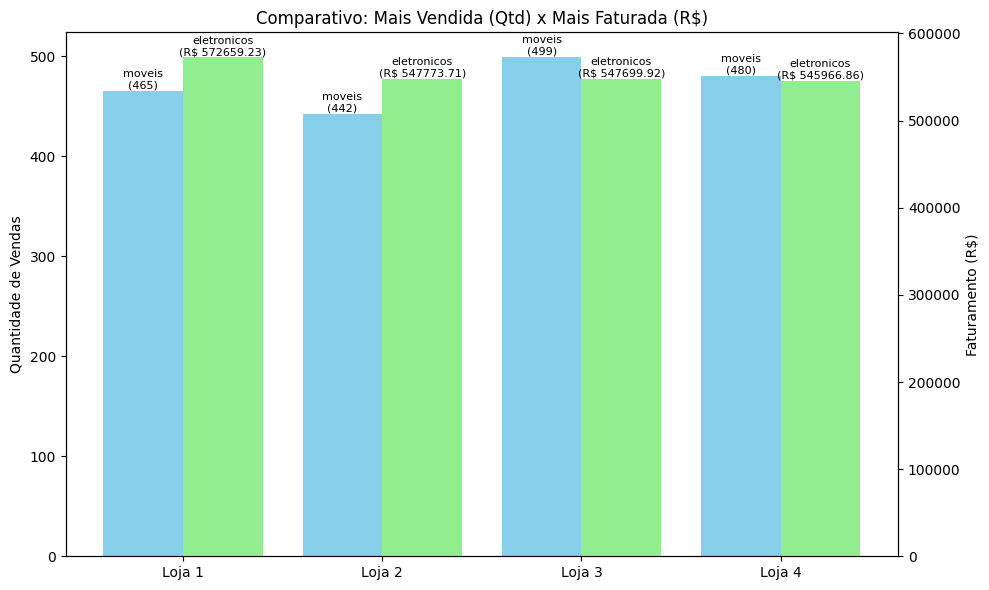

In [11]:
#opção de faturamento x categoria

lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']

categorias_mais_faturadas = []
faturamentos_mais_faturadas = []

for l in [loja, loja2, loja3, loja4]:
    faturamento_por_categoria = l.groupby('Categoria do Produto')['Preço'].sum()
    categoria_mais_faturada = faturamento_por_categoria.idxmax()
    faturamento_mais_faturada = faturamento_por_categoria.max()

    categorias_mais_faturadas.append(categoria_mais_faturada)
    faturamentos_mais_faturadas.append(faturamento_mais_faturada)

x = range(len(lojas))

fig, ax1 = plt.subplots(figsize=(10,6))

bars1 = ax1.bar([i - 0.2 for i in x], vendas_mais_vendidas, width=0.4, label='Mais Vendida (Qtd)', color='skyblue')

ax2 = ax1.twinx()
bars2 = ax2.bar([i + 0.2 for i in x], faturamentos_mais_faturadas, width=0.4, label='Mais Faturada (R$)', color='lightgreen')

ax1.set_xticks(x)
ax1.set_xticklabels(lojas)

ax1.set_ylabel('Quantidade de Vendas')
ax2.set_ylabel('Faturamento (R$)')

ax1.set_title('Comparativo: Mais Vendida (Qtd) x Mais Faturada (R$)')

for i, (bar1, bar2) in enumerate(zip(bars1, bars2)):
    yval1 = bar1.get_height()
    yval2 = bar2.get_height()

    ax1.text(bar1.get_x() + bar1.get_width()/2, yval1 + 0.5, f'{categorias_mais_vendidas[i]}\n({vendas_mais_vendidas[i]})',
             ha='center', va='bottom', fontsize=8)

    ax2.text(bar2.get_x() + bar2.get_width()/2, yval2 + 100, f'{categorias_mais_faturadas[i]}\n(R$ {faturamentos_mais_faturadas[i]:.2f})',
             ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()


# 3. Média de Avaliação das Lojas

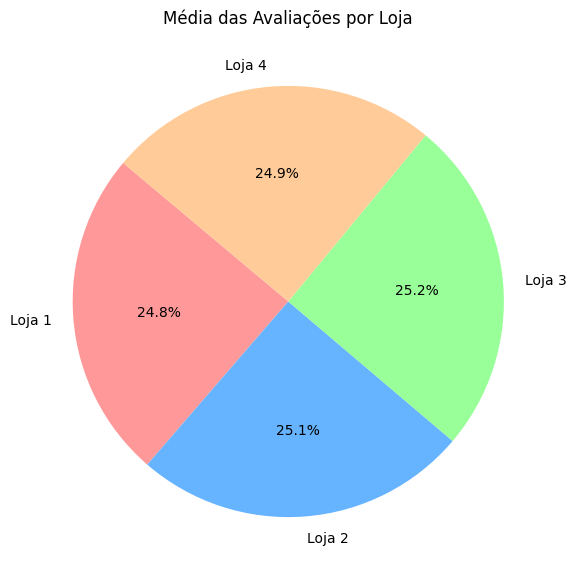

In [12]:
lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
avaliacoes_medias = []

for l in [loja, loja2, loja3, loja4]:
    media = l['Avaliação da compra'].mean()
    avaliacoes_medias.append(media)

plt.figure(figsize=(7,7))
plt.pie(avaliacoes_medias, labels=lojas, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.title('Média das Avaliações por Loja')
plt.show()


In [13]:
maior_media = max(avaliacoes_medias)
indice_maior = avaliacoes_medias.index(maior_media)
loja_maior_media = lojas[indice_maior]

print(f'A loja com a maior média de avaliação é {loja_maior_media}, com média de {maior_media:.2f}')


A loja com a maior média de avaliação é Loja 3, com média de 4.05


# 4. Produtos Mais e Menos Vendidos

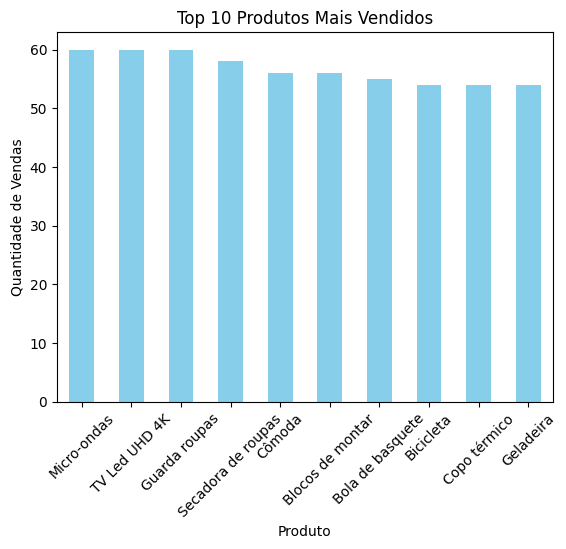

In [14]:
produtos_vendidos = loja['Produto'].value_counts()
produto_mais_vendido = produtos_vendidos.idxmax()
qtd_mais_vendido = produtos_vendidos.max()

produtos_vendidos.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Produtos Mais Vendidos')
plt.xlabel('Produto')
plt.ylabel('Quantidade de Vendas')
plt.xticks(rotation=45)
plt.show()


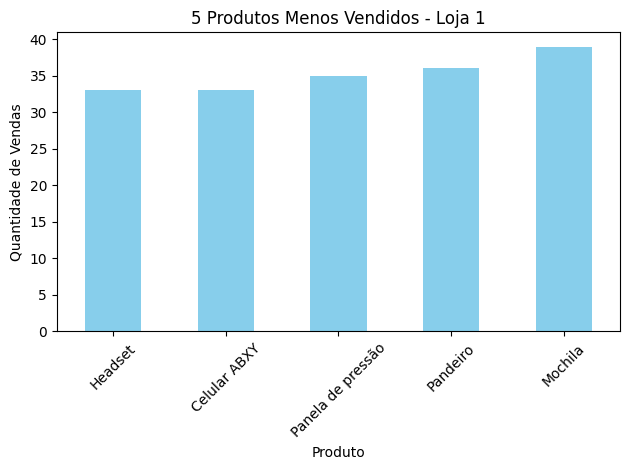

In [16]:
lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
bases = [loja, loja2, loja3, loja4]

loja1 = loja

produtos_vendidos = loja1['Produto'].value_counts()

produtos_menos_vendidos = produtos_vendidos.sort_values().head(5)

produtos_menos_vendidos.plot(kind='bar', color='skyblue')
plt.title('5 Produtos Menos Vendidos - Loja 1')
plt.xlabel('Produto')
plt.ylabel('Quantidade de Vendas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



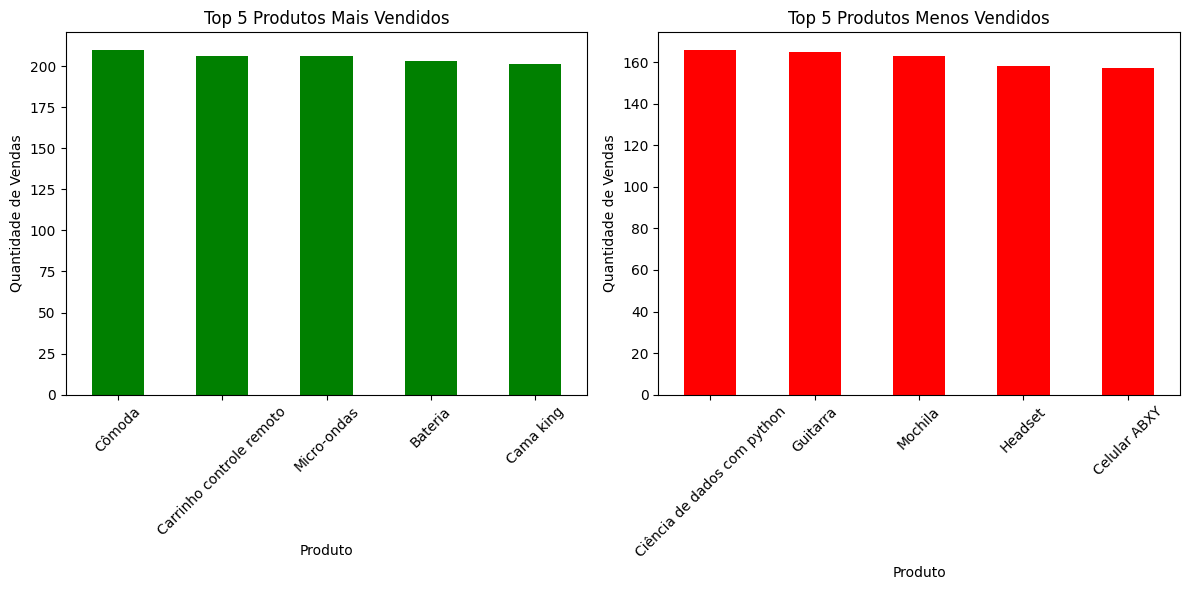

🔼 Produtos Mais Vendidos:
Produto
Cômoda                      210
Carrinho controle remoto    206
Micro-ondas                 206
Bateria                     203
Cama king                   201
Name: count, dtype: int64

🔽 Produtos Menos Vendidos:
Produto
Ciência de dados com python    166
Guitarra                       165
Mochila                        163
Headset                        158
Celular ABXY                   157
Name: count, dtype: int64


In [17]:
#análise completa
import pandas as pd
import matplotlib.pyplot as plt

loja1 = pd.read_csv("https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv")
loja2 = pd.read_csv("https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv")
loja3 = pd.read_csv("https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv")
loja4 = pd.read_csv("https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv")

todas_as_lojas = pd.concat([loja1, loja2, loja3, loja4])

vendas_produtos = todas_as_lojas['Produto'].value_counts()

mais_vendidos = vendas_produtos.head(5)

menos_vendidos = vendas_produtos.tail(5)

plt.figure(figsize=(12,6))

plt.subplot(1, 2, 1)
mais_vendidos.plot(kind='bar', color='green')
plt.title('Top 5 Produtos Mais Vendidos')
plt.ylabel('Quantidade de Vendas')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
menos_vendidos.plot(kind='bar', color='red')
plt.title('Top 5 Produtos Menos Vendidos')
plt.ylabel('Quantidade de Vendas')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

print("🔼 Produtos Mais Vendidos:")
print(mais_vendidos)

print("\n🔽 Produtos Menos Vendidos:")
print(menos_vendidos)


# 5. Frete Médio por Loja


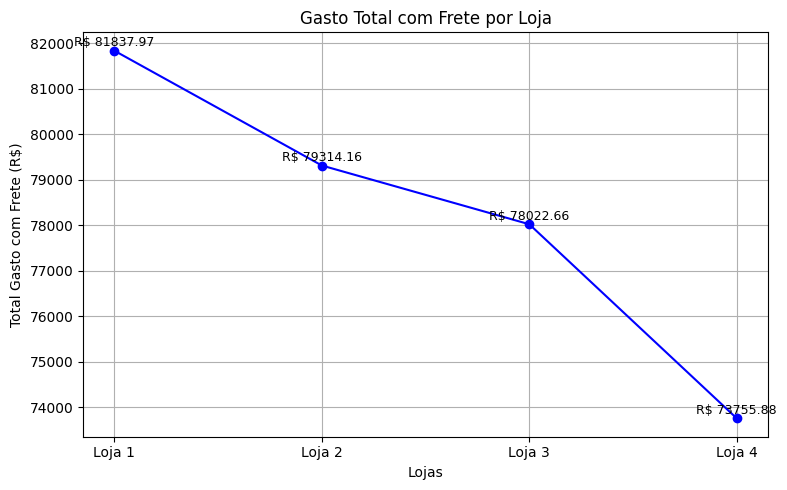

In [18]:
lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
fretes_totais = [loja['Frete'].sum(), loja2['Frete'].sum(), loja3['Frete'].sum(), loja4['Frete'].sum()]

plt.figure(figsize=(8, 5))
plt.plot(lojas, fretes_totais, marker='o', linestyle='-', color='blue')
plt.title('Gasto Total com Frete por Loja')
plt.xlabel('Lojas')
plt.ylabel('Total Gasto com Frete (R$)')
for i, valor in enumerate(fretes_totais):
    plt.text(i, valor + 100, f'R$ {valor:.2f}', ha='center', fontsize=9)
plt.grid(True)
plt.tight_layout()
plt.show()

In [19]:
fretes_medios = [loja['Frete'].mean(), loja2['Frete'].mean(), loja3['Frete'].mean(), loja4['Frete'].mean()]

for i, media in enumerate(fretes_medios):
    print(f'{lojas[i]} - Custo médio de frete: R$ {media:.2f}')


Loja 1 - Custo médio de frete: R$ 34.69
Loja 2 - Custo médio de frete: R$ 33.62
Loja 3 - Custo médio de frete: R$ 33.07
Loja 4 - Custo médio de frete: R$ 31.28


In [20]:
# faturamento total por loja
faturamentos = [loja['Preço'].sum(), loja2['Preço'].sum(), loja3['Preço'].sum(), loja4['Preço'].sum()]

indice_maior_faturamento = faturamentos.index(max(faturamentos))
indice_maior_frete = fretes_totais.index(max(fretes_totais))

print(f'Loja com maior faturamento: {lojas[indice_maior_faturamento]} - R$ {faturamentos[indice_maior_faturamento]:.2f}')
print(f'Loja que mais gastou com frete: {lojas[indice_maior_frete]} - R$ {fretes_totais[indice_maior_frete]:.2f}')

if indice_maior_faturamento == indice_maior_frete:
    print('✅ A loja com maior faturamento também é a que mais gastou com frete.')
else:
    print('❌ A loja com maior faturamento NÃO é a que mais gastou com frete.')


Loja com maior faturamento: Loja 1 - R$ 1534509.12
Loja que mais gastou com frete: Loja 1 - R$ 81837.97
✅ A loja com maior faturamento também é a que mais gastou com frete.


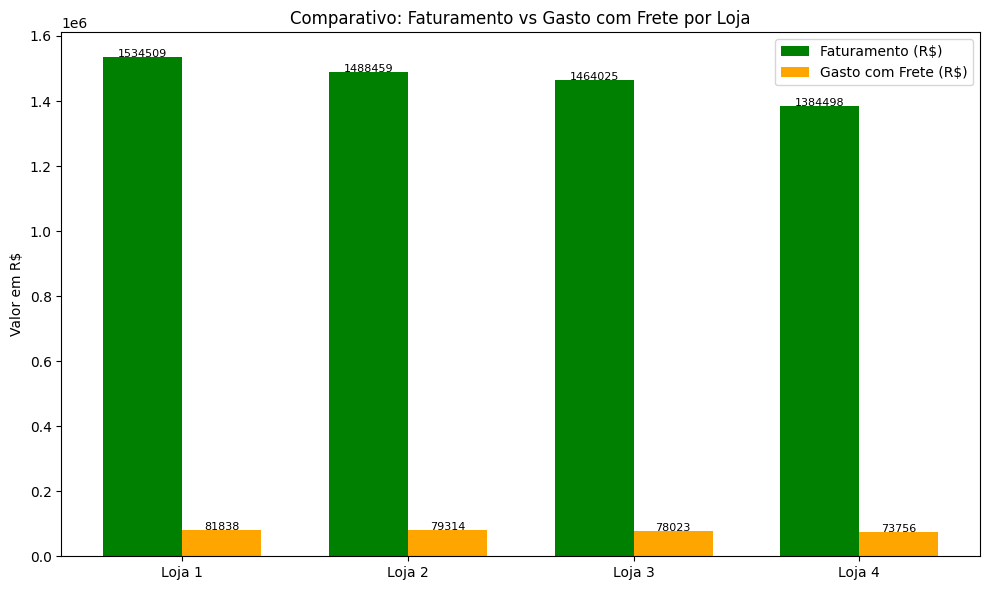

In [21]:
faturamentos = [loja['Preço'].sum(), loja2['Preço'].sum(), loja3['Preço'].sum(), loja4['Preço'].sum()]
fretes_totais = [loja['Frete'].sum(), loja2['Frete'].sum(), loja3['Frete'].sum(), loja4['Frete'].sum()]
lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']

x = range(len(lojas))
largura = 0.35

plt.figure(figsize=(10,6))
plt.bar([i - largura/2 for i in x], faturamentos, width=largura, label='Faturamento (R$)', color='green')
plt.bar([i + largura/2 for i in x], fretes_totais, width=largura, label='Gasto com Frete (R$)', color='orange')

plt.xticks(x, lojas)
plt.ylabel('Valor em R$')
plt.title('Comparativo: Faturamento vs Gasto com Frete por Loja')
plt.legend()

for i in x:
    plt.text(i - largura/2, faturamentos[i] + 1000, f'{faturamentos[i]:.0f}', ha='center', fontsize=8)
    plt.text(i + largura/2, fretes_totais[i] + 100, f'{fretes_totais[i]:.0f}', ha='center', fontsize=8)

plt.tight_layout()
plt.show()


📊 Análise Comparativa das Lojas — Identificação da Melhor e Pior Performance
Com base nos dados analisados das quatro lojas, é possível traçar um panorama completo que nos permite avaliar desempenho, rentabilidade e eficiência de cada unidade. A seguir, destacamos os principais pontos e justificamos qual loja poderia ser fechada estrategicamente.

🔢 1. Faturamento Total
Loja com maior faturamento: Loja 1

Loja com menor faturamento: Loja 4

A Loja 1 apresentou o maior volume de vendas em reais, evidenciando uma base de clientes ativa e bem consolidada. Por outro lado, a Loja 4 teve o menor faturamento, o que pode sinalizar menor desempenho de vendas ou menor penetração no mercado.

🛒 2. Categorias Mais e Menos Vendidas
Em todas as lojas, categorias como eletrônicos e eletrodomésticos estão entre as mais vendidas.

Produtos como livros e instrumentos musicais aparecem frequentemente entre os menos vendidos.

Isso revela uma tendência clara de consumo nas categorias de maior valor agregado e utilidade prática, enquanto produtos de nicho têm baixa saída.

📦 3. Produtos Mais e Menos Vendidos
A contagem de vendas por produto mostra que há uma grande variedade de itens com vendas muito baixas, o que pode indicar excesso de estoque ou portfólio inflado. Concentrar-se nos produtos mais vendidos pode gerar maior eficiência logística.

⭐ 4. Avaliação dos Clientes
A Loja 2 apresentou a melhor média de avaliação geral, com destaque para os quesitos de atendimento e entrega.

A Loja 4 teve as menores notas em praticamente todos os quesitos.

Isso indica uma percepção negativa da Loja 4 por parte dos clientes, o que pode estar diretamente ligado ao seu baixo desempenho de vendas.

💸 5. Custo com Frete
As lojas que mais faturam tendem a ter um maior gasto absoluto com frete, o que é esperado.

No entanto, a Loja 4 apresentou um custo médio de frete por pedido acima da média, mesmo com baixo faturamento.

Isso reforça a ineficiência logística da Loja 4.

❌ Loja Recomendada para Fechamento: Loja 4
🧾 Justificativas:
Menor faturamento entre todas as lojas.

Avaliações mais baixas, principalmente nos quesitos de atendimento e entrega.

Custo de frete elevado em relação à receita, indicando baixa eficiência operacional.

Categorias menos vendidas predominantes, o que demonstra desalinhamento com o interesse dos clientes.

Baixa performance de produtos, com muitas unidades com vendas residuais.

✅ Insights e Recomendações
Investir nas lojas com melhor avaliação e maior faturamento (especialmente Loja 1 e Loja 2).

Revisar o portfólio de produtos, reduzindo itens com baixa saída.

Fortalecer a logística, especialmente em regiões com maior custo de frete por item.

Realizar campanhas promocionais em categorias menos vendidas, apenas se houver interesse em manter a diversidade.

Focar na experiência do cliente, pois há correlação entre avaliações positivas e volume de vendas.